## 1.0 Business Understanding


#### 1.1 Business Overview  
Customer churn, where subscribers discontinue services or switch to competitors, is a major challenge in the telecom industry. Syriatel, one of Syria’s largest telecom providers with over 6 million active customers and a 55% market share, faces rising churn despite strong coverage and service reliability. 

A [2024 study by Alisha Sikri and colleagues](https://www.nature.com/articles/s41598-024-63750-0), published in Scientific Reports emphasizes that retaining existing customers is more cost-effective than acquiring new ones, making churn prediction a strategic priority.  
This project leverages machine learning to predict at-risk customers, enabling proactive retention strategies that improve loyalty, optimize resources, and sustain profitability.  


#### 1.2 Business Problem

Syriatel is struggling with rising customer churn, which threatens its revenue and market position. The business problem is to find a way to identify customers who are most likely to leave in advance, so the company can take action to retain them and reduce losses. Developing a predictive solution is critical to identify  customers likely to churn early and take proactive steps to retain them.  


#### 1.3 Business Objectives

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

1. To determine how customer demographics influence churn.  
2. To examine the effect of service usage on churn.  
3. To analyze the impact of financial factors on churn.  
4. To identify behavioral indicators that signal potential churn.  
5. To segment customers and assess which groups are most at risk of churning.  

Research Questions  
1. How do customer demographics influence churn?  
2. Does service usage affect the likelihood of churn?  
3. How do financial factors such as billing and payment methods relate to churn?  
4. What behavioral indicators can signal potential churn?  
5. Which customer segments are most at risk of churning?  



#### 1.4 Success criteria:
 - A reliable classification model that can correctly predict customer churn and provide actionable insights for SyriaTel
 - The model identifies the most important features that explain why customers churn
 - The findings can be translated into clear, practical recommendations that SyriaTel can act on to reduce churn

## 2.0 Data Understanding

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (Yes) or remained (No).


#### 2.1 Load Dataset
1. Import libraries (pandas, numpy, matplotlib, seaborn).
2. Load dataset.

In [1]:
# Import libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings for better readability
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset 
data = pd.read_csv(r'C:\Users\USER\Desktop\Phase_3\Group_9_Phase_3_project\data\bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### 2.2 Dataset Overview

In [3]:
# Summary information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric e.g `total minutes, charges, account length` and categorical e.g `international plan, voicemail plan`.  Our Target variable is `Churn` column which is boolen.

In [4]:
# statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#checking the columns
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
# Check for duplicate values
data.duplicated().sum()

0

In [7]:
#checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

No missing values recorded in the dataset

In [8]:
# Checking the target distribution for class imbalance
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [9]:
#checking the % of class imbalance
data['churn'].value_counts(normalize = True) * 100

False    85.508551
True     14.491449
Name: churn, dtype: float64

The target variable is imbalanced hence we will deal with the issue in the next section.

## 3.0 Data Preparation
In this section, we will look into data cleaning techniques, Exploratory Data Analysis (EDA) and data preprocessing for our dataset.

### 3.1 Data Cleaning

Handle Missing Values




In [10]:
# Check for missing values in  dataset

print(data.isnull().sum())


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


The SyriaTel dataset has no missing values.

Check for and handle duplicates if any

In [11]:
# Check for  duplicate rows
duplicates = data.duplicated().sum()
duplicates

0

No duplicates for the data.



Next step is to Standardize column names. This  makes column names consistent and easier to work with like `total day minutes` becomes `total_day_minutes`.

In [12]:
# Dataset columns before standardizing
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [13]:
# Columns standardization
data.columns = data.columns.str.lower().str.replace(' ', '_')

# Dataset columns after standardizing
data.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'customer_service_calls', 'churn'],
      dtype='object')

Next is data conversion.

In [14]:
# Data types conversion
data.dtypes

state                      object
account_length              int64
area_code                   int64
phone_number               object
international_plan         object
voice_mail_plan            object
number_vmail_messages       int64
total_day_minutes         float64
total_day_calls             int64
total_day_charge          float64
total_eve_minutes         float64
total_eve_calls             int64
total_eve_charge          float64
total_night_minutes       float64
total_night_calls           int64
total_night_charge        float64
total_intl_minutes        float64
total_intl_calls            int64
total_intl_charge         float64
customer_service_calls      int64
churn                        bool
dtype: object

In [15]:
# Convert object data types to category data types

data["state"] = data["state"].astype("category")
data["international_plan"] = data["international_plan"].astype("category")
data["voice_mail_plan"] = data["voice_mail_plan"].astype("category")
data["churn"] = data["churn"].astype("category")
data['area_code'] = data['area_code'].astype('category')

# Check the data types after conversion
data.dtypes

state                     category
account_length               int64
area_code                 category
phone_number                object
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                     category
dtype: object

Since `phone_number` is a unique identifier we will drop it.

In [16]:
# Drop the phone_number column

data = data.drop(columns = ["phone_number"])

data.shape # Check the dataset shape after dropping the column

(3333, 20)

### 3.2 EDA
This step involves investigating a dataset to understand its main characteristics and uncover patterns.

#### 3.2.1 Univariate analysis
Univariate analysis examines each variable individually to understand its distribution and central tendency.

We begin with categorical columns

In [17]:
# Distribution of categorical features
categorical_features = data.select_dtypes(include = ["category", "object"]).columns
categorical_features

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

False    85.508551
True     14.491449
Name: churn, dtype: float64


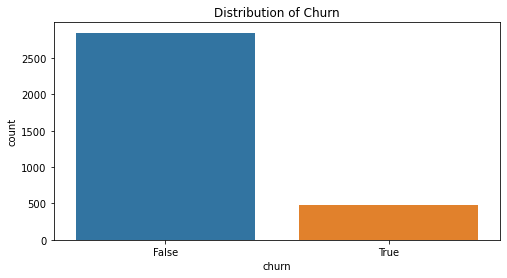

In [18]:
# Distribution of target variable churn

data["churn"].value_counts() # Count of target variable

# Percentage of target variable
churn_percentage = data["churn"].value_counts(normalize = True) * 100
print(churn_percentage)

# Visualize the target variable distribution
plt.figure(figsize = (8, 4))
sns.countplot(x = "churn", data = data)
plt.title("Distribution of Churn")
plt.show()

85.5% of customers did not churn, while 14.5% of customers left. This shows that the majority of customers are retained, but the minority who churn are strategically important for the business. The dataset is therefore imbalanced.

no     3010
yes     323
Name: international_plan, dtype: int64
no     90.309031
yes     9.690969
Name: international_plan, dtype: float64


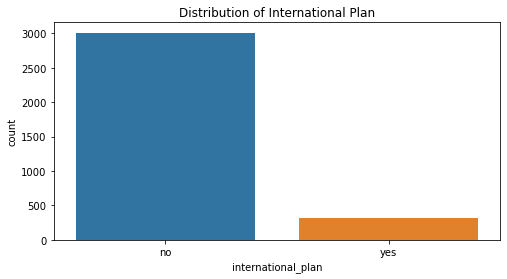

In [19]:
# Distribution of international_plan column
int_plan = data["international_plan"].value_counts() 
print(int_plan)

int_percentage = data["international_plan"].value_counts(normalize = True) * 100
print(int_percentage)

# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "international_plan", data = data)
plt.title("Distribution of International Plan")
plt.show()

About 3010 customers are not subscribed to an international plan while 323 have the international plan.

no     2411
yes     922
Name: voice_mail_plan, dtype: int64
no     72.337234
yes    27.662766
Name: voice_mail_plan, dtype: float64


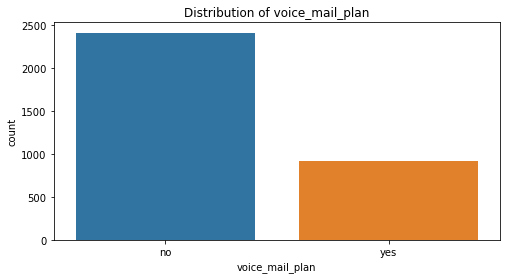

In [20]:
# Distribution of voice_mail_plan
voicemail_plan = data["voice_mail_plan"].value_counts() 
print(voicemail_plan)

voicemail_percentage = data["voice_mail_plan"].value_counts(normalize = True) * 100
print(voicemail_percentage)

# Visualize
plt.figure(figsize = (8,4))
sns.countplot(x = "voice_mail_plan", data = data)
plt.title("Distribution of voice_mail_plan")
plt.show()

72% of customers do not have voicemail plan. 28% have a voice mail plan, so usage is moderate compared to the international plan.

415    1655
510     840
408     838
Name: area_code, dtype: int64
415    49.654965
510    25.202520
408    25.142514
Name: area_code, dtype: float64


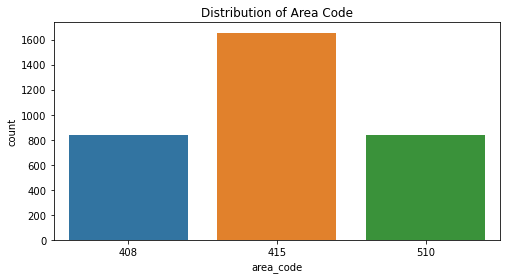

In [21]:
# Distribution of area_code column

area_code = data["area_code"].value_counts() 
print(area_code)

area_code_percentage = data["area_code"].value_counts(normalize = True) * 100
print(area_code_percentage)

# Visualize
plt.figure(figsize = (8, 4))
sns.countplot(x = "area_code", data = data)
plt.title("Distribution of Area Code")
plt.show()

Almost half of the customers are in the 415 area code. The remaining customers are roughly evenly split between 510 and 408.

WV    106
MN     84
NY     83
AL     80
OH     78
Name: state, dtype: int64


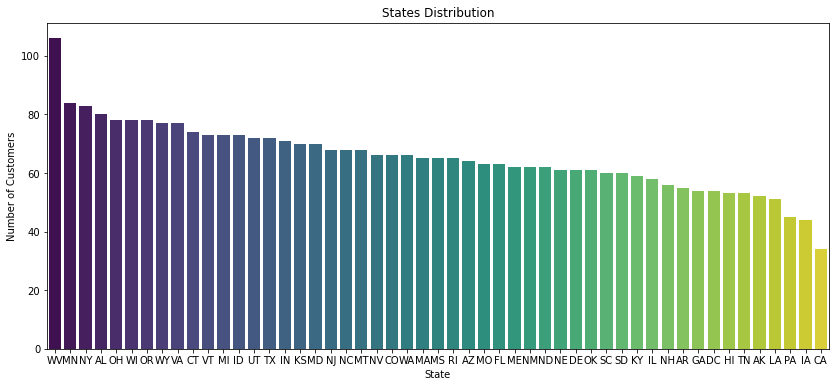

In [22]:
# Distribution of state column

states = data['state'].value_counts() # Get states by count
print(states.head())

# Visualize
plt.figure(figsize = (14, 6))
sns.barplot(x = states.index, y = states.values, palette = 'viridis', order = states.index)

plt.title("States Distribution")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()

WV has the highest number of customers with 106, making up the largest share in this group. MN, NY, AL, and OR follow closely, ranging from 78 to 84 customers.

In [ ]:
# Distribution for numerical features
numerical_features = data.select_dtypes(include = ["int64", "float64"]).columns
numerical_features

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls'],
      dtype='object')

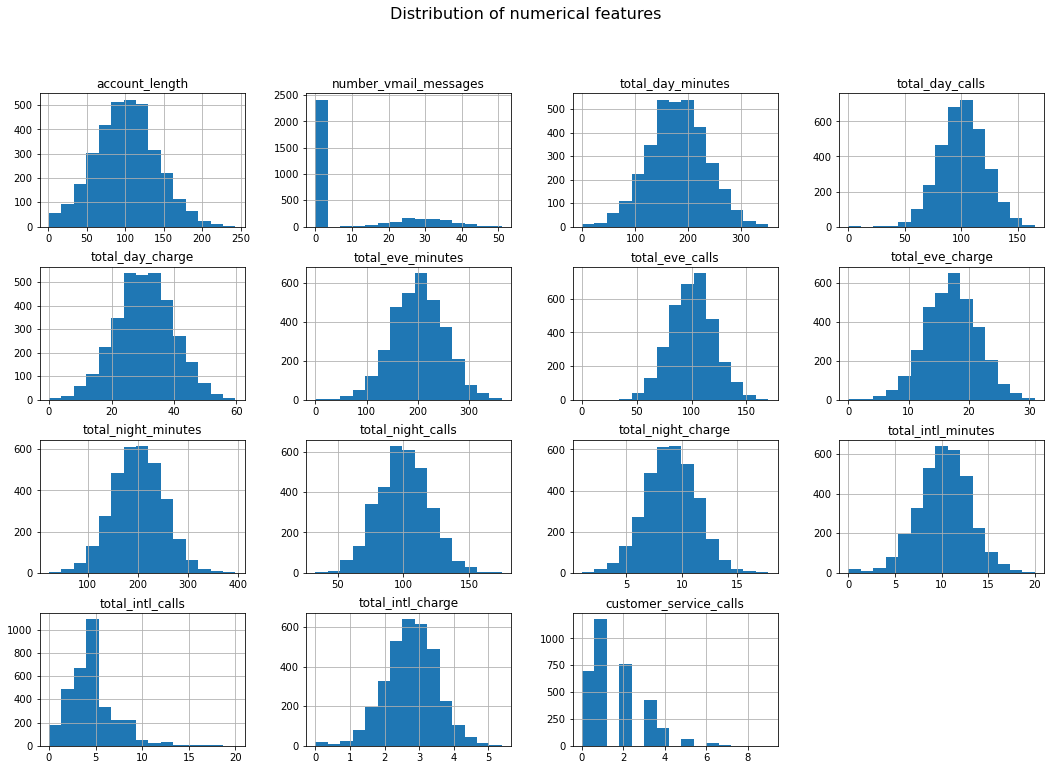

In [24]:
# Plot histogram for numerical features
data[numerical_features].hist(bins = 15, figsize = (18, 12))

plt.suptitle("Distribution of numerical features",fontsize = 16)
plt.show()

Most numerical features (like call minutes and charges) look normally distributed, but some like voicemail messages are skewed.

#### 3.2.2 Bivariate Analysis
Bivariate analysis examines the relationship between two variables to see how one may affect or relate to the other. In our case, the main focus will be how other variables relate to churn.

We begin by answering how does the frequency of customer service calls relate to customer churn?

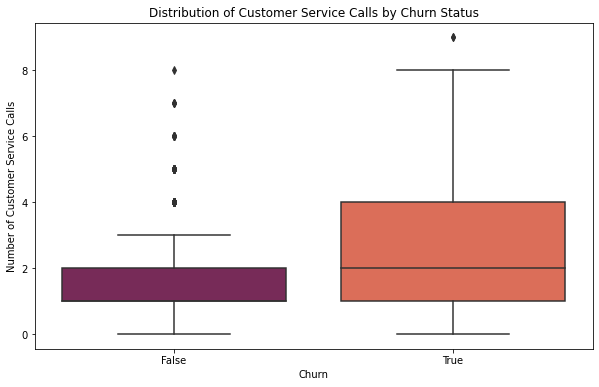

In [28]:
# Bivariate analysis: Customer service calls vs Churn

plt.figure(figsize = (10, 6))
sns.boxplot(data = data, x = 'churn', y = 'customer_service_calls', palette = 'rocket')
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')

plt.show()

Customers who churn tend to have made more customer service calls compared to those who stay.

Next we answer the question Is customer churn related to account length?


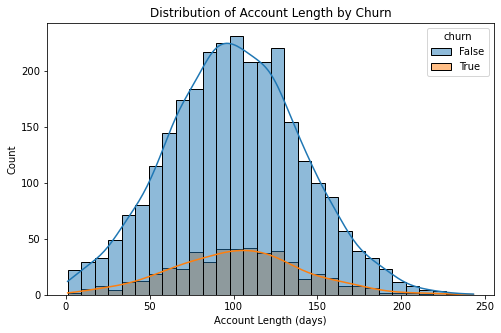

In [29]:
#histogram to show the distribution of account length by churn
plt.figure(figsize = (8,5))
sns.histplot(data = data, x = 'account_length', hue = 'churn', kde = True, bins = 30)
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length (days)")
plt.ylabel("Count")
plt.show()

Both churners (orange) and non-churners (blue) follow a bell-shaped distribution.Churn is more common among newer and mid-tenure customers, while long-tenure customers are less likely to churn.

Next question to answer is does having an international or voicemail plan affect churn?

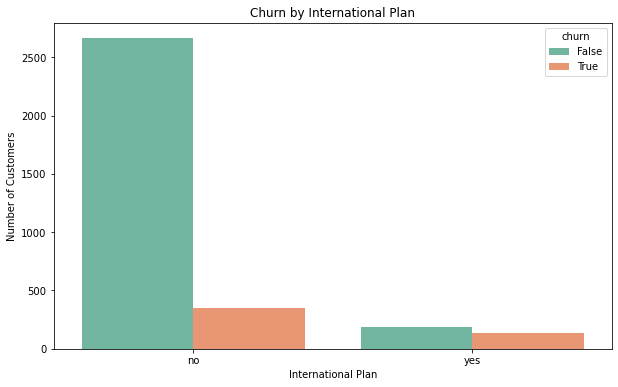

In [30]:
# Plot to show relationship between international plan and churn

# Plot
plt.figure(figsize = (10,6))
sns.countplot(x = 'international_plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show()

The majority of customers do not have an international plan churn . Customers with an international plan are a smaller group.

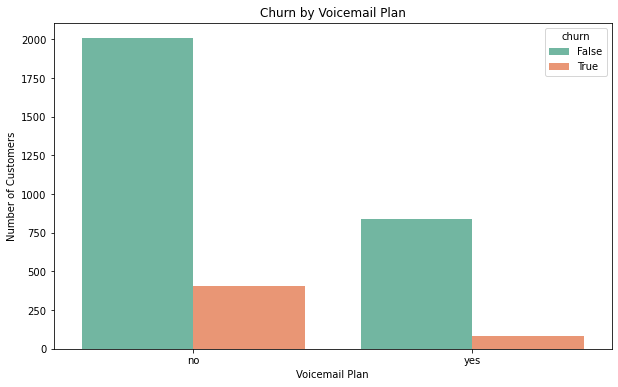

In [31]:
# Bar plot to show the relationship between voicemail plan and churn
plt.figure(figsize = (10, 6))
sns.countplot(x = 'voice_mail_plan', hue = data['churn'].astype(str), data = data, palette = 'Set2')
plt.title("Churn by Voicemail Plan")
plt.xlabel("Voicemail Plan")
plt.ylabel("Number of Customers")
plt.show();

Customers with the the plan are more likely to churn compared to those without it.

#### 3.2.3 Multivariate analysis
This involves a multivariate analysis examining relationships between multiple variables simultaneously.

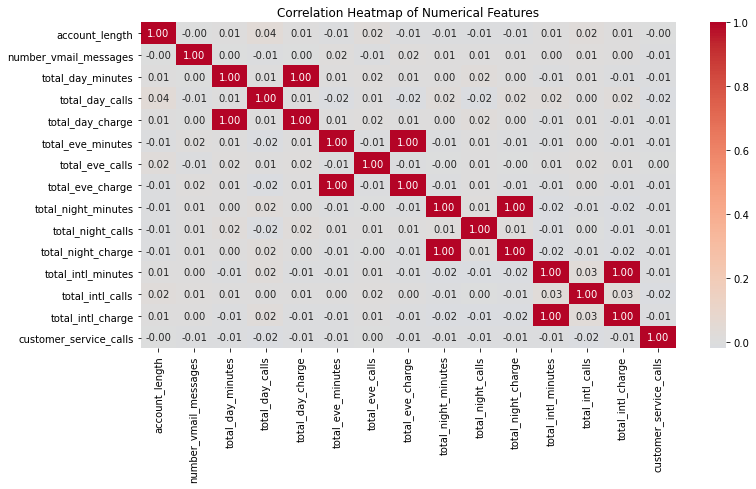

In [33]:
numeric_data = data.select_dtypes(include = ["number"])  # keep only numbers
plt.figure(figsize = (12, 6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")
#annot is for placing the numbers inside the squares
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

From the correlation heatmap, some of the features share a perfect correlation of 1.0. They include

`total_day_charge` and `total_day_minutes` features.

`total_eve_charge` and `total_eve_minutes` features.

`total_night_charge` and `total_night_minutes` features.

`total_intl_charge` and `total_intl_minutes` features.

This causes severe multicollinearity because one varibale is perfectly predictable from the other.

Since our problem is business focused, the charges matter more than minutes hence will drop the minutes columns.

In [34]:
# Drop all minutes columns (keep charges)
minutes_cols = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']

data = data.drop(columns = minutes_cols)

print("Remaining features:", data.columns)


Remaining features: Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')


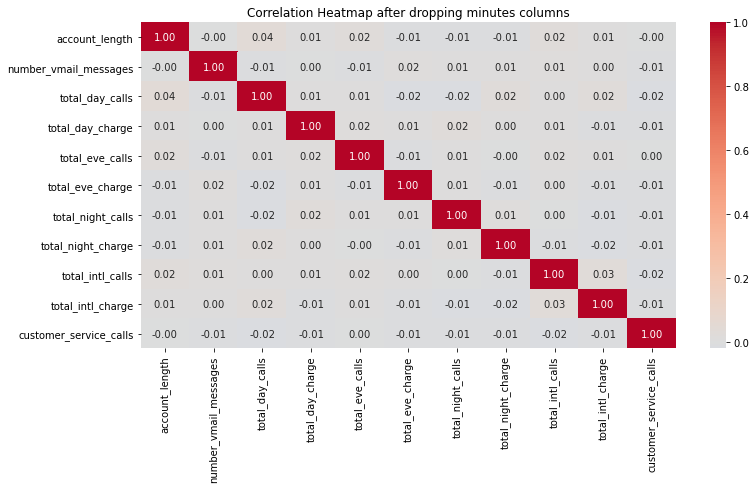

In [35]:
numeric_data = data.select_dtypes(include = ["number"])  # keep only numbers
plt.figure(figsize = (12, 6))
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm", center = 0, fmt = ".2f")
#annot is for placing the numbers inside the squares
plt.title("Correlation Heatmap after dropping minutes columns")
plt.show()

#### 3.2.4 Checking outliers

In [36]:
# describe the dataset
data.describe()

,account_length,number_vmail_messages,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,customer_service_calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,1.562856
std,39.822106,13.688365,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,1.000000
50%,101.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,1.000000
75%,127.000000,20.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,2.000000
max,243.000000,51.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,9.000000


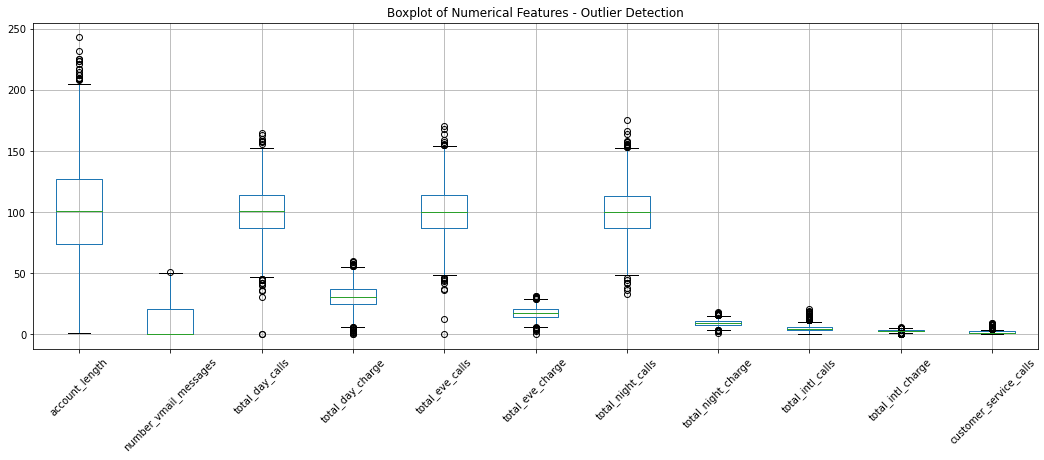

In [37]:
# Visualize outliers for numerical features

numerical_features = data.select_dtypes(include = ["int64", "float64"]).columns
plt.figure(figsize = (18, 6))
data[numerical_features].boxplot()
plt.title("Boxplot of Numerical Features - Outlier Detection")
plt.xticks(rotation = 45)
plt.show()

Outliers were retained as they reflect genuine customer behaviors that may be strong indicators of churn.

#### 3.2.5 Feature encoding




We label encoding the target variable

In [38]:
# Check the unique values and their counts before encoding
print("Value counts before encoding:")
print(data['churn'].value_counts())


Value counts before encoding:
False    2850
True      483
Name: churn, dtype: int64


In [39]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # create an instance of Label Encoder
data["churn"] = label_encoder.fit_transform(data["churn"]) # Fit and transform the target variable

# Check the counts after encoding
print("Value counts after encoding:")
print(data['churn'].value_counts())

Value counts after encoding:
0    2850
1     483
Name: churn, dtype: int64


We go on to One Hot Encoding

In [40]:
# One hot encoding for categorical features except target variable churn
data = pd.get_dummies(data, columns = ["state", "area_code", "international_plan", "voice_mail_plan"], drop_first = True)
data.shape

(3333, 66)

#### 3.2.6 Data Splitting

In [42]:
# Import train_test_split
from sklearn.model_selection import train_test_split

In [43]:
# Split the dataset into features and target variable
X = data.drop(columns = ["churn"], axis = 1)
y = data["churn"] 

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 42, stratify = y) 
# stratify ensures the split maintains the same class imbalance as the original dataset.
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 65), (1000, 65), (2333,), (1000,))

#### 3.2.7 Handling Class Imbalance

From our earlier analysis, we observed that the target variable has a high class imbalance. To resolve this issue, we will employ a technique called SMOTE (Synthetic Minority Over-sampling Technique).

In [46]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state = 42)

# Fit and resample training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


#Check our new distribution
print("Before SMOTE:", y_train.value_counts())

print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: 0    1995
1     338
Name: churn, dtype: int64
After SMOTE: 1    1995
0    1995
Name: churn, dtype: int64
